In [3]:
import numpy as np
import matplotlib.pyplot as plt
import qpmr
import qpmr.plot

is_logger_initialized = False
if not is_logger_initialized:
    logger = qpmr.init_logger(level="DEBUG")
    is_logger_initialized = True

In [4]:
region = (-12, 1, -0.1, 5000)

# Gi - identified system
Gi_num = np.array([[1.816*1e6, 1.055*1e5, 2286.]])
Gi_denum = np.array([[3.079*1e6, 2.581*1e5, 9647, 167.5, 1.]])

# Gm - model parameters K and T
K = 0.59
T = 0.018

# delays
tau = 0.2
tau_m = 0.212

# D(s) - input-shaper like structure
theta = 0.01
N = 60
tau_vector = theta * np.arange(0, N, 1, dtype=np.float64)

# these gains were sent as correct ones later
gains = np.array([3.18419888499517, -8.55006730630735, 7.20804319626175, 20.8242855731446,
                  -6.98819718206270, -20.1849552841814, 2.55098297500236, 5.35346406689096,
                  -5.66728253720343, 1.76092216986347, 2.95360281683304, -4.28799405248918,
                  1.39777992979417, 2.34697134257513, -3.57660291251610, 1.38982228186985,
                  1.98505708058481, -3.46991984257449, 1.62166767533749, 1.89645149324260,
                  -3.86994338042140, 2.11291793462551, 2.18097014111035, -5.13335367003861,
                  2.86163128245455, 3.19992555366216, -8.53434063764039, 7.22376986492874,
                  20.8400122418116, -6.97247051339561, -20.1692286155144, 2.56670964366931,
                  5.36919073555793, -5.65155586853645, 1.77664883853048, 2.96932948550004,
                  -4.27226738382219, 1.41350659846120, 2.36269801124215, -3.56087624384912,
                  1.40554895053682, 2.00078374925181, -3.45419317390750, 1.63739434400443,
                  1.91217816190956, -3.85421671175439, 2.12864460329249, 2.19669680977736,
                  -5.11762700137162, 2.87735795112152, 3.21565222232914, -8.51861396897338,
                  7.23949653359569, 20.8557389104785, -6.95674384472881, -20.1535019468474,
                  2.58243631233637, 5.38491740422488, -5.63582919986946, 1.79237550719740])

# expected zeros location for complete vibration suppression
expected_zeros = np.array([4,8,12,16,20,24,28,32]) * 1j * 2 * np.pi

In [5]:
tau = qpmr.QuasiPolynomial(np.array([[1.]]), np.array([tau]))
tau_m = qpmr.QuasiPolynomial(np.array([[1.]]), np.array([tau_m]))
Gi = qpmr.TransferFunction(
    num=qpmr.QuasiPolynomial.from_array(Gi_num),
    denum=qpmr.QuasiPolynomial.from_array(Gi_denum),
)
D = qpmr.QuasiPolynomial(gains[:, np.newaxis], tau_vector)
C = qpmr.TransferFunction(
    num=qpmr.QuasiPolynomial.from_array(np.array([1, T])), # T*s + 1
    denum=qpmr.QuasiPolynomial.from_array(np.array([0, K])), # K*s
) * D
Gm = qpmr.TransferFunction(
    num=qpmr.QuasiPolynomial.from_array(np.array([K])),
    denum=qpmr.QuasiPolynomial.from_array(np.array([1, T])),
)

tf = (1 - C * Gm * tau_m) / (1 + C * (Gi * tau - Gm * tau_m) )

2025-06-09 13:17:33,613 - qpmr.quasipoly.core - DEBUG - Original quasipolynomial:
[[  3.18419888   0.05731558]
 [ -8.55006731  -0.15390121]
 [  7.2080432    0.12974478]
 [ 20.82428557   0.37483714]
 [ -6.98819718  -0.12578755]
 [-20.18495528  -0.3633292 ]
 [  2.55098298   0.04591769]
 [  5.35346407   0.09636235]
 [ -5.66728254  -0.10201109]
 [  1.76092217   0.0316966 ]
 [  2.95360282   0.05316485]
 [ -4.28799405  -0.07718389]
 [  1.39777993   0.02516004]
 [  2.34697134   0.04224548]
 [ -3.57660291  -0.06437885]
 [  1.38982228   0.0250168 ]
 [  1.98505708   0.03573103]
 [ -3.46991984  -0.06245856]
 [  1.62166768   0.02919002]
 [  1.89645149   0.03413613]
 [ -3.86994338  -0.06965898]
 [  2.11291793   0.03803252]
 [  2.18097014   0.03925746]
 [ -5.13335367  -0.09240037]
 [  2.86163128   0.05150936]
 [  3.19992555   0.05759866]
 [ -8.53434064  -0.15361813]
 [  7.22376986   0.13002786]
 [ 20.84001224   0.37512022]
 [ -6.97247051  -0.12550447]
 [-20.16922862  -0.36304612]
 [  2.56670964   0.

2025-06-09 13:17:40,892 - qpmr.qpmr_v2 - WARNING - Spectra of quasi-polynomials with real coefficients aresymetrical by real axis, specified region region=(-12, 1, -0.1, 5000) is unnecessarily large. It is advised to switch to region=[-12, 1, 0, 5000]
2025-06-09 13:17:40,892 - qpmr.qpmr_v2 - DEBUG - Grid size not specified, setting as ds=0.3917197822431164 (solved by heuristic)
2025-06-09 13:17:40,894 - qpmr.qpmr_v2 - DEBUG - Estimated size of complex grid = 8173440.0 bytes
2025-06-09 13:17:51,731 - qpmr.qpmr_v2 - DEBUG - Num. Re 0-level contours: 619


[ 0.03818833-1.37512712e-01j -5.66816722-4.88139120e-03j
  0.1522349 -1.80413165e-02j -5.43755477+7.01602001e+00j
 -4.94078156+1.40152969e+01j -4.15831608+2.09381898e+01j
 -3.9803916 +2.89988327e+01j -4.41122604+3.60018774e+01j
 -4.15340842+4.30270351e+01j -3.10000555+5.13340951e+01j
 -3.82068858+5.93869511e+01j -3.57774738+6.68758792e+01j
 -2.1654696 +7.54321947e+01j -3.32422672+8.40413445e+01j
 -3.190567  +9.16280811e+01j -1.52799777+1.00150396e+02j
 -2.97699262+1.09068368e+02j -2.89525531+1.16709819e+02j
 -1.06528556+1.25087413e+02j -2.64576101+1.34113648e+02j
 -2.60817692+1.41792952e+02j -0.69084104+1.50123236e+02j
 -2.38313298+1.59074709e+02j -2.36196241+1.66751626e+02j
 -0.38375066+1.75232772e+02j -2.31612858+1.84127521e+02j
 -2.30773859+1.91656399e+02j -0.17663765+2.00402527e+02j
 -2.57368885+2.09976224e+02j -3.01593114+2.17834529e+02j
 -3.37451713+2.25371601e+02j -3.87893336+2.33054939e+02j
 -4.21493972+2.41000668e+02j -4.27479713+2.48882829e+02j
 -4.3433979 +2.56563583e+02j -4

2025-06-09 13:17:53,204 - qpmr.numerical_methods - DEBUG - Numerical Newton converged in 21/100 steps, last MAX(|res|) = 7.448425323942084e-08
2025-06-09 13:17:53,206 - qpmr.argument_principle - DEBUG - Enlarging region from region=(-12, 1, -0.1, 5000) to reg=[-12.039171978224312, 1.0391719782243116, -0.13917197822431165, 5000.039171978225]
2025-06-09 13:18:15,503 - qpmr.argument_principle - DEBUG - Using argument principle, contour integral = 617.0325789673328 | rounded to 617.0
2025-06-09 13:18:15,506 - qpmr.argument_principle - DEBUG - Enlarging region from region=[-11.960828021775688, 0.9608280217756884, -0.06082802177568837, 4999.960828021775] to reg=[-12.0, 1.0, -0.1, 5000.0]
2025-06-09 13:18:38,029 - qpmr.argument_principle - DEBUG - Using argument principle, contour integral = 617.033311792779 | rounded to 617.0
2025-06-09 13:18:38,073 - qpmr.qpmr_v2 - WARNING - Spectra of quasi-polynomials with real coefficients aresymetrical by real axis, specified region region=(-12, 1, -0.1

[-2.11818316e-01-1.74301677e-01j  1.59567127e-01-7.79320209e-02j
 -1.83062751e-01+4.47013473e-02j -2.02058913e+00+8.70208617e+00j
 -2.15617054e+00+1.64675994e+01j  1.56281361e-03+2.51270263e+01j
 -2.10723104e+00+3.38424161e+01j -2.13094790e+00+4.14951571e+01j
  7.78845724e-03+5.02558951e+01j -2.16002458e+00+5.89469590e+01j
 -2.14930379e+00+6.65772531e+01j  1.81496496e-03+7.53958078e+01j
 -2.24128307e+00+8.41444510e+01j -2.22013942e+00+9.17616204e+01j
  1.34502183e-03+1.00533419e+02j -2.26911076e+00+1.09366582e+02j
 -2.25154262e+00+1.17005531e+02j  1.33037876e-03+1.25664073e+02j
 -2.18389148e+00+1.34458486e+02j -2.20172335e+00+1.42153042e+02j
  8.84183500e-03+1.50802554e+02j -2.08758418e+00+1.59430767e+02j
 -2.11816271e+00+1.67105495e+02j  1.01267129e-02+1.75929031e+02j
 -2.16581280e+00+1.84479822e+02j -2.17355085e+00+1.91994024e+02j
  9.28499726e-03+2.01055575e+02j -2.57971935e+00+2.10308933e+02j
 -3.04799092e+00+2.18211904e+02j -3.37862678e+00+2.25763950e+02j
 -3.88108303e+00+2.334006

2025-06-09 13:18:43,660 - qpmr.numerical_methods - DEBUG - Numerical Newton converged in 36/100 steps, last MAX(|res|) = 9.583532952623227e-08
2025-06-09 13:18:43,660 - qpmr.argument_principle - DEBUG - Enlarging region from region=(-12, 1, -0.1, 5000) to reg=[-12.039171978224312, 1.0391719782243116, -0.13917197822431165, 5000.039171978225]
2025-06-09 13:18:54,893 - qpmr.argument_principle - DEBUG - Using argument principle, contour integral = 616.0383268564359 | rounded to 616.0
2025-06-09 13:18:54,895 - qpmr.argument_principle - DEBUG - Enlarging region from region=[-11.960828021775688, 0.9608280217756884, -0.06082802177568837, 4999.960828021775] to reg=[-12.0, 1.0, -0.1, 5000.0]
2025-06-09 13:19:06,081 - qpmr.argument_principle - DEBUG - Using argument principle, contour integral = 616.0394029464074 | rounded to 616.0


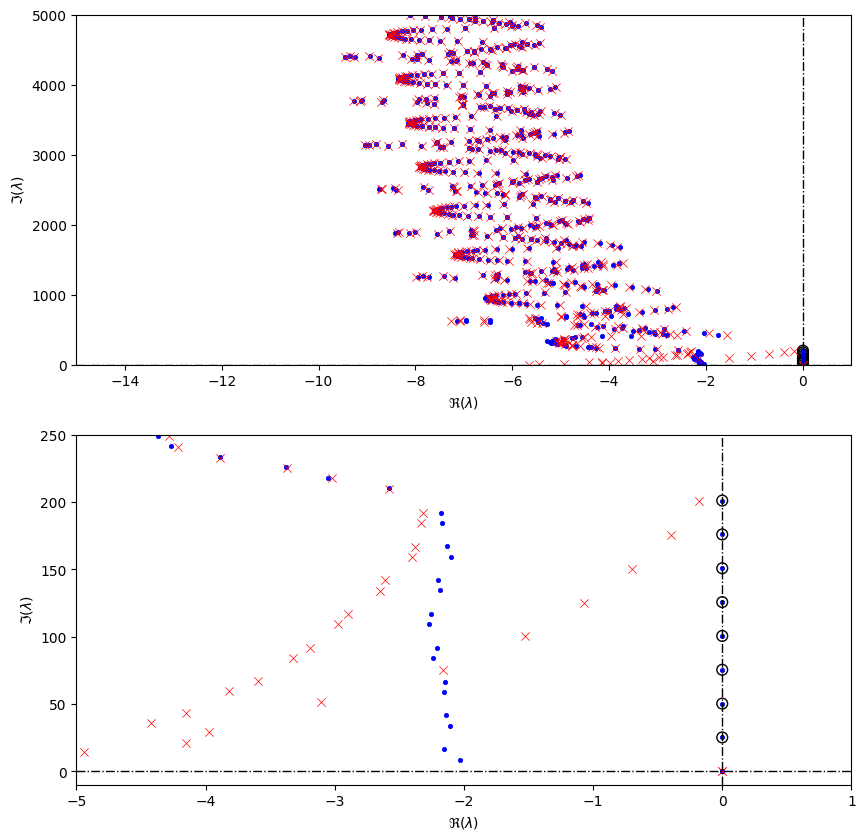

In [6]:
poles, _ = qpmr.qpmr(region, tf.denum.coefs, tf.denum.delays)    
zeros, _ = qpmr.qpmr(region, tf.num.coefs, tf.num.delays)

In [8]:
line_width = 252.0 / 72 # 1 pt = 1/72 inches

In [ ]:
fig, ax = plt.subplots(figsize=(line_width, 3))
qpmr.plot.pole_zero(poles, zeros, ax=ax)
ax.set_xlim((-15, 1))
ax.set_ylim((0, 5000))


qpmr.plot.chain_asymptotes(mi, abs_wk, region, ax=ax)
qpmr.plot.roots(roots, ax=ax)
plt.tight_layout()
ax.set_ylim((-1,50))
ax.set_xlim((-3,None))

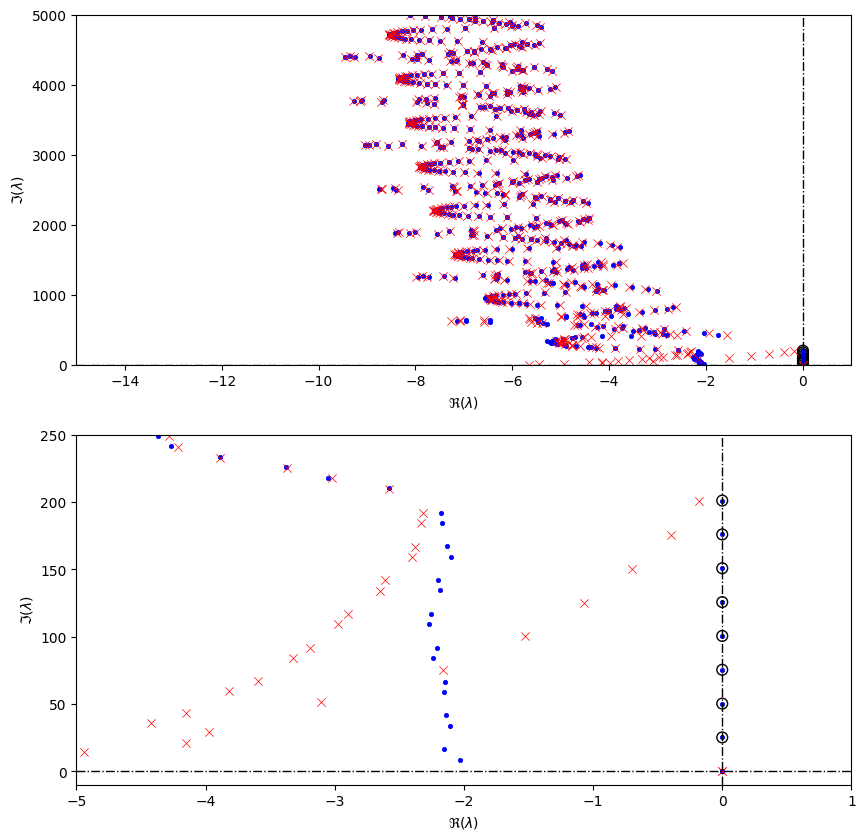

In [ ]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10,10))
ax1.scatter(expected_zeros.real, expected_zeros.imag, marker="o", s=60, edgecolors="k", facecolors='none')


ax2.scatter(expected_zeros.real, expected_zeros.imag, marker="o", s=60, edgecolors="k", facecolors='none')
ax2 = qpmr.plot.pole_zero(poles, zeros, ax=ax2)
ax2.set_xlim((-5, 1))
ax2.set_ylim((-10, 250)) 
plt.show()